In [1]:
import os
os.chdir("../")
print(os.getcwd())

/opt/dlami/nvme/xhuan192/codes/med-vlrm


In [2]:
import json
import sys
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
results_json_path = "outputs/estimate_pass_rate/qwen2_5-vl-7b-instruct-med-vlm-m23k/eval_results.jsonl"

In [4]:
results = []
with open(results_json_path, "r") as f:
    for line in f:
        results.append(json.loads(line))

print(f"Total results: {len(results)}")

Total results: 23456


In [5]:
results[0]

{'dp_index': 0,
 'prompts': '<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\nYou will solve a problem/request. You should provide your thoughts within <think> </think> tags before providing the answer.\\nWrite your final answer within <answer> </answer> tags. Here is the question:\\n\\n\n\nQuestion: Stellate Reticulum First appears in:\nOptions:\n\nA. Cap Stage.\n\nB. Bus Stage.\n\nC. Advanced Bell Stage.\n\nD. Early Bell Stage.<|im_end|>\n<|im_start|>assistant\n',
 'dataset_name': 'openlifescienceai/medmcqa',
 'dataset_index': 15425,
 'answer_label': 'A',
 'answer': 'Cap Stage.',
 'parsed_outputs': [{'output_text': 'The correct answer for the stellate reticulum appearing first is not among the given options. However, to provide more context:\n\nThe stellate reticulum often refers to the internal placement pattern seen in the formation of cochlear ducts, which is primarily examined in the Embryological stages of the cochlea, not in developmental stages lik

In [6]:
dataset_index_list = []
for i, result in enumerate(results):
    dataset_index_list.append(result["dataset_index"])
print(f"Total datasets: {len(set(dataset_index_list))}")
# find which one is missing from 0 - len(dataset_index_list) - 1
missing_datasets = set(range(len(dataset_index_list))) - set(dataset_index_list)
print(f"Missing datasets: {missing_datasets}")

Total datasets: 23456
Missing datasets: {18576, 10913, 563, 703, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 6002}


In [7]:
num_correct_list = []
for result in results:
    num_correct = result["num_correct"]
    num_correct_list.append(num_correct)


In [8]:
# get the number of different num_correct values
import collections
num_correct_counter = collections.Counter(num_correct_list)
num_correct_counter = {k: num_correct_counter[k] for k in sorted(num_correct_counter)}
print("Number of different num_correct values:", len(num_correct_counter))
print("Num correct values:", num_correct_counter)
# get the percentage of each num_correct value
num_correct_percentage = {k: num_correct_counter[k] / len(results) * 100 for k in sorted(num_correct_counter)}
print("Num correct percentage:", num_correct_percentage)

Number of different num_correct values: 17
Num correct values: {0: 8123, 1: 4604, 2: 3012, 3: 2174, 4: 1593, 5: 1109, 6: 811, 7: 616, 8: 455, 9: 333, 10: 218, 11: 160, 12: 109, 13: 80, 14: 39, 15: 17, 16: 3}
Num correct percentage: {0: 34.630798090040926, 1: 19.628240109140517, 2: 12.841064120054572, 3: 9.268417462482947, 4: 6.79143929058663, 5: 4.72800136425648, 6: 3.457537517053206, 7: 2.626193724420191, 8: 1.9398021828103684, 9: 1.4196793997271486, 10: 0.929399727148704, 11: 0.6821282401091405, 12: 0.464699863574352, 13: 0.34106412005457026, 14: 0.166268758526603, 15: 0.07247612551159617, 16: 0.012789904502046385}


/tmp/ipykernel_1303324/2235685692.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


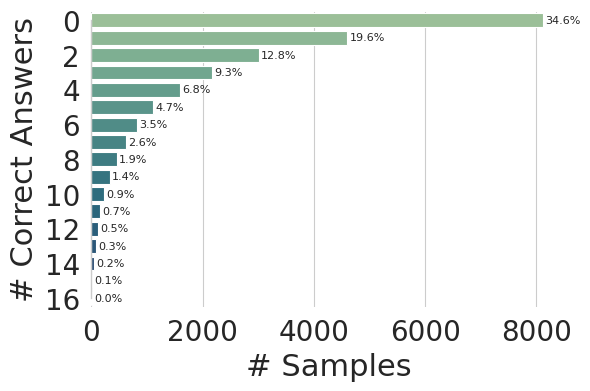

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ------------------------------------------------------------------
# 1 .  Prepare data -------------------------------------------------
# ------------------------------------------------------------------
# Convert your Counter/dict to a tidy Series and sort by key
data = pd.Series(num_correct_counter, name="count").sort_index()
# Compute percentages once for the bar labels
pct = (data / data.sum()).round(3)           # keeps three-decimals accuracy
labels = pct.apply(lambda x: f"{x:.1%}")     # e.g. 34.6 %

# ------------------------------------------------------------------
# 2 .  Figure aesthetics -------------------------------------------
# ------------------------------------------------------------------
sns.set_theme(
    context="paper",          # font sizes tuned for print
    style="whitegrid",        # light grid behind bars
    palette="colorblind",     # colour-blind safe palette
    font="DejaVu Sans"        # replace with journal requirement if any
)

fig, ax = plt.subplots(figsize=(6, 4))       # 1-column width, ~4 : 3 ratio

# ------------------------------------------------------------------
# 3 .  Plot ---------------------------------------------------------
# ------------------------------------------------------------------
# palette = sns.cubehelix_palette(
#     n_colors=len(data),
#     start=0.5,     # hue
#     rot=-0.75,     # direction/amount of rotation
#     light=0.85,    # lightest shade
#     dark=0.25,     # darkest shade
# )
# generate a dark-to-light gradient, one colour per bar
palette = sns.color_palette("crest", n_colors=len(data))   # “rocket” reversed
# └─ alternatives: "mako", "crest", "viridis", "flare", …
sns.barplot(
    x=data.values,
    y=data.index.astype(str),   # y-axis labels: class names as strings (0,1,…)
    orient='h',
    ax=ax,
    palette=palette,
)

# Add text labels at the end of each bar (percentage)
for bar, txt in zip(ax.patches, labels):
    ax.text(
        bar.get_width() + 0.005 * data.max(),   # small offset from bar end
        bar.get_y() + bar.get_height()/2,
        txt,
        va='center',
        ha='left',
        fontsize='small'
    )

# ------------------------------------------------------------------
# 4 .  Final touches -----------------------------------------------
# ------------------------------------------------------------------
fontsize = 22   
ax.set_xlabel("# Samples", fontsize=fontsize)
ax.set_ylabel("# Correct Answers", fontsize=fontsize)      # or “Correct answers per item”
# ax.set_title(
#     "Distribution of Items by Number of Correct Answers\n"
#     "(N = 23 456)"
# )


# ──-  Choose which classes to label  ───────────────────────────────
step = 2                    # keep every 2nd level → 0, 2, 4, …
keep = data.index[::step]   # data.index is an Int64Index: 0,1,2,…
ax.set_yticks(keep)                      # where the ticks sit
ax.set_yticklabels(keep.astype(str))     # what the ticks show

# If you also want the grid lines only at those kept positions:
ax.yaxis.set_major_locator(mticker.FixedLocator(keep))

ticker_fontsize = 20
ax.tick_params(axis='both', labelsize=ticker_fontsize)  # 'both' applies to x and y axis


sns.despine(trim=True, left=False, bottom=True)
plt.tight_layout()

# ------------------------------------------------------------------
# 5 .  Save in vector + raster formats -----------------------------
# ------------------------------------------------------------------
# fig.savefig("pass_rate_distribution.pdf")       # vector (recommended)
# fig.savefig("pass_rate_distribution.png", dpi=300)


/tmp/ipykernel_1303324/4187205380.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


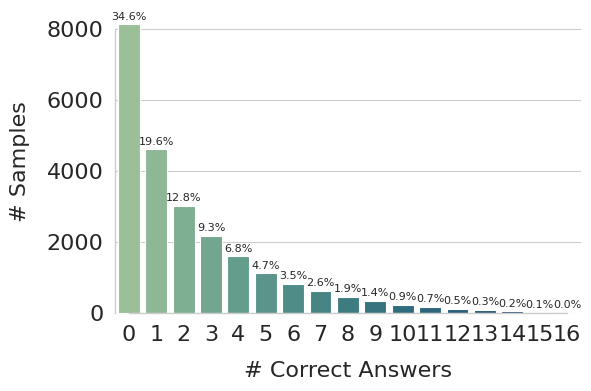

In [ ]:
#!/usr/bin/env python3
"""
Pass-rate distribution plot
--------------------------------
Switches the axes compared with the original horizontal plot:
    •  x-axis  – number of correct answers (0,1,2,…)
    •  y-axis  – number of samples
Fonts/tick-labels are larger and percentages are printed above each bar.
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = (
    pd.Series(num_correct_counter, name="count")   # to Series
      .sort_index()                                # keep natural order 0,1,2…
)
pct = (data / data.sum()).round(3)                 # exact percentages
pct_labels = pct.apply(lambda x: f"{x:.1%}")       # ==> "34.6 %", …

# ----------------------------------------------------------------------
# 2.  Figure aesthetics  ------------------------------------------------
# ----------------------------------------------------------------------
sns.set_theme(
    context="paper",          # sensible defaults for print
    style="whitegrid",        # light grid
    palette="colorblind",     # colour-blind safe
    font="DejaVu Sans",
)

# Optional: set global font sizes once for *all* figures
plt.rcParams.update({
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
})

fig, ax = plt.subplots(figsize=(6, 4))             # 1-column, ~4:3 ratio

# ----------------------------------------------------------------------
# 3.  Plot  -------------------------------------------------------------
# ----------------------------------------------------------------------
palette = sns.color_palette("crest", n_colors=len(data))

sns.barplot(
    x=data.index.astype(str),    # categories 0,1,2,… on x-axis
    y=data.values,               # counts on y-axis
    ax=ax,
    palette=palette,
)

# Percentage text labels
for bar, txt in zip(ax.patches, pct_labels):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01 * data.max(),   # 1 % above bar
        txt,
        ha="center", va="bottom", fontsize="small"
    )

# ----------------------------------------------------------------------
# 4.  Final touches  ----------------------------------------------------
# ----------------------------------------------------------------------
ax.set_xlabel("# Correct Answers",  labelpad=12)   # pad = gap to ticks
ax.set_ylabel("# Samples",          labelpad=12)

sns.despine(trim=True)
plt.tight_layout()

# ----------------------------------------------------------------------
# 5.  Export  -----------------------------------------------------------
# ----------------------------------------------------------------------
# fig.savefig("pass_rate_distribution.pdf")       # vector (recommended)
# fig.savefig("pass_rate_distribution.png", dpi=300)

plt.show()
